# Adatok betöltése és szemrevételezése:

In [3]:
import os
import pandas as pd

# Get the current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)
# Load the training and test data
pd_train = pd.read_excel(r'C:\basic_projects\AI_kurzus\beadando\01_regression_model\01_main\02_data\filtered_train_data.xlsx')
pd_test = pd.read_excel(r'02_data/Test.xlsx')  # Make sure this path is correct
print('Shape of train:\n')
print(pd_train.shape)
print('Shape of test:\n')
print(pd_test.shape)
print('\nHead of train:\n')
print(pd_train.head())
print('\nHead of test:\n')
print(pd_test.head())
print('\n')


Current working directory: c:\basic_projects\AI_kurzus\beadando\01_regression_model\01_main
Shape of train:

(8440, 6)
Shape of test:

(1000, 5)

Head of train:

   Unnamed: 0     AT      V       AP      RH      PE
0           0  10.54  34.03  1018.71   74.00  478.77
1           1   7.08  39.99  1010.55   91.44  482.83
2           2  14.49  41.16  1000.50   82.17  465.24
3           3  10.73  25.36  1009.35  100.15  469.43
4           4  22.88  63.91  1009.63   87.82  442.50

Head of test:

      AT      V       AP     RH      PE
0   9.59  38.56  1017.01  60.10  481.30
1  12.04  42.34  1019.72  94.67  465.36
2  13.87  45.08  1024.42  81.69  465.48
3  13.72  54.30  1017.89  79.08  467.05
4  15.14  49.64  1023.78  75.00  463.58




# Feature selection és adatok transzformálása:
- **Feature selection:** Előfordulhat hogy PE-t nem az összes válatozó függvényében szeretnénk illesztni. ('AT', 'AP', 'V', 'RH')
    így felkészítjük a kódot a feature selection-re

- **Standardization and Normalization:** Mivel az adatok más nagyságrendbe esnek és ez egyes regressziós modellek illesztésést elvhieti, így az adatokat tarnszformálva előállítjuk a stanardizált és a normlizált adatsort. 
    

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the training data
pd_train = pd.read_excel(r'C:\basic_projects\AI_kurzus\beadando\01_regression_model\01_main\02_data\filtered_train_data.xlsx')

# Load the test data
pd_test = pd.read_excel(r'02_data/Test.xlsx')  # Update this path

# Selecting the features and target for the training set
X_train = pd_train[['AT', 'AP', 'V', 'RH']]  # Features: Ambient Temperature, Pressure, Vacuum, Humidity
Y_train = pd_train['PE']  # Target: Power Output

# Selecting the features and target for the test set
X_test = pd_test[['AT', 'AP', 'V', 'RH']]  # Ensure the same features as the training set
Y_test = pd_test['PE']

# Standardizálás
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Teszt adatok skálázása

# Normalizálás
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)  # Teszt adatok skálázása



## Regressziós Modellek és Csoportosítások

### 1. Lineáris regressziós modellek:
- **LinearRegression**: Alap lineáris regressziós modell.
- **RidgeRegression**: L2 regularizációval ellátott Ridge regresszió.

### 2. Legközelebbi szomszéd alapú regressziós modellek:
- **KNeighborsRegressor (5 szomszéd)**: Az 5 legközelebbi szomszéd átlagát használja.
- **KNeighborsRegressor (10 szomszéd)**: Az 10 legközelebbi szomszéd átlagát használja.

### 3. Támogató Vektor Gép alapú regressziós modellek (SVR):
- **SVR (poly kernel)**: Polinomiális kernellel.
- **SVR (rbf kernel)**: Radiális bázisfüggvény (Gaussiánus) kernellel.

### 4. Fa-alapú regressziós modellek:
- **RandomForestRegressor**: Több döntési fa kombinációját használja.
- **DecisionTreeRegressor**: Egyetlen döntési fa modell.
- **BaggingRegressor**: SVR alapmodellként, több példány átlagolásával.

### 5. Neurális hálózat alapú regressziós modellek (MLPRegressor):
- **Multilayer Perceptron 100 RELU ADAM**: 100 rejtett neuronnal, RELU aktivációval, ADAM solverrel.
- **Multilayer Perceptron 100 RELU LBFGS**: 100 rejtett neuronnal, RELU aktivációval, LBFGS solverrel.
- **Multilayer Perceptron 100 IDENTITY ADAM**: 100 rejtett neuronnal, IDENTITY aktivációval, ADAM solverrel.
- **Multilayer Perceptron 100 LOGISTIC ADAM**: 100 rejtett neuronnal, LOGISTIC aktivációval, ADAM solverrel.
- **További MLPRegressor variánsok**: 50, 40, és 30 rejtett neuronnal, minden esetben RELU aktivációval és ADAM solverrel.



In [7]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor

# Creating the model groups
LR = LinearRegression()
RidgeRegression = Ridge(alpha=1.0)
models_functions= {
    'LinearRegression'  : LR,
    'RidgeRegression'   : RidgeRegression
}

#Nearest Neighbors regressions
n_neighbors = 5
knn_5 = KNeighborsRegressor(n_neighbors)
n_neighbors = 10
knn_10 = KNeighborsRegressor(n_neighbors)
models_nearest_neighbors = {
    '5 Neighbors Regressor'     : knn_5,
    '10 Neighbors Regressor'    : knn_10
}

#Epsilon-Support Vector Regressions
svr_poly_model = SVR(kernel='poly')
svr_rbf_model = SVR(kernel='rbf')
models_support_vector = {
    'support_vector_regression_rbf_model'   : svr_rbf_model,
    'support_vector_regression_poly_model'  : svr_poly_model
}

# Decision Tree Regressions
random_forest = RandomForestRegressor(n_estimators=100)
model_decision_tree_regressor = DecisionTreeRegressor(max_depth=5)
bagging_regressor = BaggingRegressor(estimator=SVR(), n_estimators=10, random_state=0)
models_tree_based_algorithms = {
    'RandomForest'                  : random_forest,
    'model_decision_tree_regressor' : model_decision_tree_regressor,
    'bagging_model'                 : bagging_regressor
}

#Neuaral network Regressions
MultilayerPerceptron_100_relu_adam      = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=10000)
MultilayerPerceptron_100_relu_lbfgs     = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='lbfgs', max_iter=10000)
MultilayerPerceptron_100_identity_adam  = MLPRegressor(hidden_layer_sizes=(100,), activation='identity', solver='adam', max_iter=10000)
MultilayerPerceptron_100_logistic_adam  = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic', solver='adam', max_iter=10000)
models_neural_network_selection = {
    'Multilayer Perceptron Regressor\n hidden layer = 100, \n activation = RELU,\n solver = ADAM \n': MultilayerPerceptron_100_relu_adam,
    'Multilayer Perceptron \n hidden layer = 100,\n activation = RELU,\n solver = LBFGS \n': MultilayerPerceptron_100_relu_lbfgs,
    'Multilayer Perceptron \n hidden layer = 100,\n activation = IDENTITY,\n solver = ADAM \n': MultilayerPerceptron_100_identity_adam,
    'Multilayer Perceptron \n hidden layer = 100,\n activation = LOGISTIC,\n solver = ADAM \n': MultilayerPerceptron_100_logistic_adam   
}

MultilayerPerceptron_100_relu_adam  = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=10000)
MultilayerPerceptron_50_relu_adam   = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=10000)
MultilayerPerceptron_40_relu_adam   = MLPRegressor(hidden_layer_sizes=(40,), activation='relu', solver='adam', max_iter=10000)
MultilayerPerceptron_30_relu_adam   = MLPRegressor(hidden_layer_sizes=(30,), activation='relu', solver='adam', max_iter=10000)
models_neural_network_layers_100_50_40_30 = {
    'Multilayer Perceptron Regressor\n hidden layer = 100,\n activation = RELU,\n solver = ADAM \n': MultilayerPerceptron_100_relu_adam,
    'Multilayer Perceptron Regressor\n hidden layer = 50,\n activation = RELU,\n solver = ADAM \n': MultilayerPerceptron_50_relu_adam,
    'Multilayer Perceptron Regressor\n hidden layer = 40,\n activation = RELU,\n solver = ADAM \n': MultilayerPerceptron_40_relu_adam,
    'Multilayer Perceptron Regressor\n hidden layer = 30,\n activation = RELU,\n solver = ADAM \n': MultilayerPerceptron_30_relu_adam   
}



# Overall model gruop
model_groups = (models_functions,
                models_nearest_neighbors,
                models_support_vector,
                models_tree_based_algorithms,
                models_neural_network_selection,
                models_neural_network_layers_100_50_40_30)

model_groups = (models_functions,
                models_nearest_neighbors,
                models_support_vector,
                models_tree_based_algorithms,
                models_neural_network_selection,
                models_neural_network_layers_100_50_40_30)
# Results shpould be stored in the Result dict
results = {}

## Modellek pontozása: 
- Minden mindolet kvatitatív számok alapján szeretnénk lemérni és összeshaonlítani.
-  Ehhez **keresztvalidációt** fogunk alakalmazni: </br>
   * Ez egy technika, amely segít megállapítani, hogy a modell mennyire jól generalizál új adatokra. 
   * A **keresztvalidáció** során az adatokat több kisebb csoportra osztjuk, és minden egyes csoportra illesztjük a modellt, miközben a többi csoport adatát tesztelésre használjuk. 
   * Ezt többször megismételve a modell teljesítményének átlaga jobb képet adhat a modell valós teljesítményéről.
</br>

 A következő **model_fiting_prediction_evaluation(model, X_train_scaled, X_test_scaled, Y_train, Y_test)** függvény pontosan ezt csinálja. 

In [8]:
from sklearn.model_selection import cross_val_score, KFold
# Keresztvalidációs konfiguráció
kf = KFold(n_splits=5, shuffle=True, random_state=42)


## Erdemények ábrázolása: 
### PE mért vs PE perdictált: 
* Tegyük fel, hogy minden modelt sikerült illeszteni és ez után a képesek vagyunk jódolni (predikálni) adatokat (PE perdicált).

* Ideális esetben a PE mérési adatok függvényében ábrázolva a PE predikált adatokat egy olyan egyenest kapun aminke a meredksége 1 és eltolása 0. 

A következő **plot_actual_predicted(Y_test=None, Y_pred=None, model_name=None)**  függvény pontosan egy ilyen ábrát fog gyártani ( egyelőre csak egy példa adatsoron): 
* PE predikált és PE mért adatpontokat kirajzolja
* Elmélti egyenes berajzolása egy szaggatott vonallal 
* Továbbá egy egyenest is illeszt az adatpontokra és az ábráról leolvasható az illesztett egynes paraméteri

Equation of the fitted line: y = 0.95x + 0.17


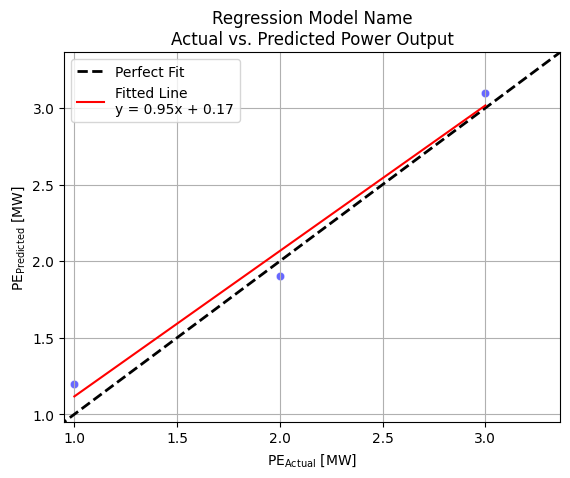

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_actual_predicted(Y_test=None, Y_pred=None, model_name=None):
    if Y_test is None or Y_pred is None or model_name is None:
        print('MISSING DATA!')
    else:
        data = pd.DataFrame({
            'Actual': Y_test,
            'Predicted': Y_pred
        })

        ax = sns.scatterplot(x='Actual', y='Predicted', data=data, color='blue', alpha=0.6)

        # Min/Max value for plotting the perfect fit line
        max_value = max(data['Actual'].max(), data['Predicted'].max())
        min_value = min(data['Actual'].min(), data['Predicted'].min())

        # Perfect fit line (where predicted equals actual)
        plt.plot([0, max_value*1.2], [0, max_value*1.2], 'k--', lw=2, label='Perfect Fit')  # Black dashed line

        # Calculate the trend line (linear fit) to represent the fitted line
        slope, intercept = np.polyfit(data['Actual'], data['Predicted'], 1)
        line = np.poly1d([slope, intercept])
        x_line = data['Actual']
        y_line = line(data['Actual'])
        line_label = f"Fitted Line \ny = {slope:.2f}x + {intercept:.2f}"
        plt.plot(x_line, y_line, "r-", label = line_label)  # Red solid line

        # Display the equation of the line
        print(f"Equation of the fitted line: y = {slope:.2f}x + {intercept:.2f}")

        ax.set(xlabel=r'PE$_{\text{Actual}}$ [MW]',  # Subscript for 'Actual'
               ylabel=r'PE$_{\text{Predicted}}$ [MW]',  # Subscript for 'Predicted'
               title=f'{model_name}\nActual vs. Predicted Power Output')

        ax.set_xlim(min_value*0.95, max_value*1.085)
        ax.set_ylim(min_value*0.95, max_value*1.085)
        plt.legend()
        plt.grid(True)
        plt.show()
        

# Example usage
Y_test_example = [1, 2, 3]
Y_pred_example = [1.2, 1.9, 3.1]
model_name_example = 'Regression Model Name'
plot_actual_predicted(Y_test_example, Y_pred_example, model_name_example)


### Regressziós modell illesztése és kiértékelése
Minden illesztendő regressziós modellel a következő 3 fő lépést fogjuk tenni: 
-  **1. Modell illesztés**:</br>
    A modellt a scálázott ( vagy normlizált ) tanító adatsorra illesztjük.
-  **2. Predikákáls**:</br>
    Az illesztett modell és a skálázott (vagy normalizált) teszt halmaz segítségével predikciót végzünk
-  **3. Kiértékelés/Pontozás**:</br>  
    A peredikált adatokat összevetjük a mérésekből származó adatokkal és keresztvalidációval valamint MSE és R2 értéket számolunk

A következő **regerssio_modeling(model, X_train_scaled, X_test_scaled, Y_train, Y_test)** függvény pontpsan ezt valósítja meg.

In [10]:
def regerssio_modeling(model, X_train_scaled, X_test_scaled, Y_train, Y_test): 
    # Model fiting
    model.fit(X_train_scaled, Y_train)
    # Makeing prediction
    Y_pred = model.predict(X_test_scaled)
    # Evaluating/Scoring the model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = model.score(X_test_scaled, Y_test)
    cv_results = cross_val_score(model, X_test_scaled,Y_test, cv=kf, scoring='neg_mean_squared_error')
    return model, Y_pred, mse, r2, cv_results

In [6]:
from colorama import Fore, Back, Style

# Fitting models and making predictions
for model_group in model_groups:
    for model_name, model in model_group.items():
        # Print Model Name
        print('\n' + 'Fitting and evaluating ' + Fore.YELLOW + f"{model_name}")
        print(Style.RESET_ALL)
        
        # Model fiting, makeing prediction, evaluating the model
        model, Y_pred, mse, r2, cv_results = regerssio_modeling(model, 
                                           X_train_scaled, 
                                           X_test_scaled, 
                                           Y_train, 
                                           Y_test)
        # Print MSE, R2 and  Coefficients, Intercept
        print(f"Mean Squared Error: {mse}\nR-squared Score: {r2}\nCross-Validation Score: {cv_results}")
        
        model_coef_exist = False
        if hasattr(model, 'coef_'):
            print(f"Coefficients: {model.coef_}")
            model_coef_exist = True 
        model_intercept_exist = False
        if hasattr(model, 'intercept_'):
            model_intercept_exist = True
            print(f"Intercept: {model.intercept_}")
        
        # Collect results
        results[model_name] = {
            "MSE"           : mse,
            "R2"            : r2,
            "cv_results"    : cv_results
        }

        print(f'{model_name} CV MSE: {-cv_results.mean()}')  # Negatív MSE átlagát pozitívvá tesszük
        # Plot PE_Actual vs PE_Predicted 
        plot_actual_predicted(Y_test, Y_pred,model_name)


Fitting and evaluating LinearRegression



NameError: name 'X_train_scaled' is not defined

### Illesztési probléma a Multilayer Perceptron esetén! 


Equation of the fitted line: y = 0.94x + 26.46


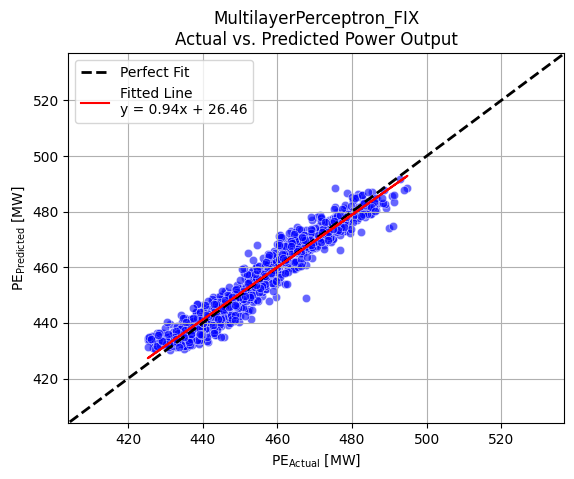

In [15]:

MultilayerPerceptron_FIX  = MLPRegressor(hidden_layer_sizes=(50,), 
                                         activation='relu', 
                                         solver='adam',
                                         max_iter=10000)

model_MLP, Y_pred, mse, r2, cv_results = regerssio_modeling(MultilayerPerceptron_FIX, X_train_scaled, X_test_scaled, Y_train, Y_test)

model_name = 'MultilayerPerceptron_FIX'
plot_actual_predicted(Y_test, Y_pred,model_name)